In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-02-05 07:37:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-02-05 07:37:26 (84.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import plot_loss_curves, unzip_data, compare_historys, walk_through_dir

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

unzip_data("101_food_classes_10_percent.zip")

--2025-02-05 07:37:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 172.253.117.207, 142.250.99.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   140MB/s    in 11s     

2025-02-05 07:37:46 (137 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [4]:
train_dir = "101_food_classes_10_percent/train"
test_dir = "101_food_classes_10_percent/test"

In [5]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/tuna_tartare'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/foie_gras'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/breakfast_burrito'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/cannoli'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/seaweed_salad'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/french_onion_soup'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/beef_tartare'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/dumplings'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/baklava'.
There are 0 directories and 250 image

In [6]:
import tensorflow as tf

In [7]:
IMG_SIZE= (224, 224)

In [8]:
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode = "categorical",
    image_size = IMG_SIZE,
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode = "categorical",
    image_size = IMG_SIZE,
    shuffle =False,
)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [9]:
checkpoint_path = "101_classes_10_percent_data_model_checkpoint.weights.h5"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    save_weights_only =True,
    monitor ="val_accuracy",
    save_best_only=True
    )

In [10]:
from tensorflow.keras import layers, preprocessing
from tensorflow.keras.models import Sequential

In [11]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
], name = "data_augmentation")

In [12]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = layers.Input(shape=(224, 224, 3), name = "input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="avg_global_pool_layer")(x)
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x)

model = tf.keras.Model(inputs, outputs)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, None, None, 1280)    │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ avg_global_pool_layer                │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 101)                 │         129,381 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [14]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [15]:
history_all_classes_10_percent = model.fit(
    train_data_all_10_percent,
    epochs = 5,
    validation_data=test_data,
    validation_steps = int(0.15 * len(test_data)),
    callbacks = [checkpoint_callback]
)

Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 54s 166ms/step - accuracy: 0.1560 - loss: 3.9762 - val_accuracy: 0.4688 - val_loss: 2.4832
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 40s 167ms/step - accuracy: 0.4688 - loss: 2.3478 - val_accuracy: 0.5148 - val_loss: 2.0361
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 41s 169ms/step - accuracy: 0.5405 - loss: 1.9209 - val_accuracy: 0.5453 - val_loss: 1.8491
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 38s 156ms/step - accuracy: 0.5838 - loss: 1.7055 - val_accuracy: 0.5392 - val_loss: 1.8000
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 35s 146ms/step - accuracy: 0.6251 - loss: 1.5572 - val_accuracy: 0.5474 - val_loss: 1.7488


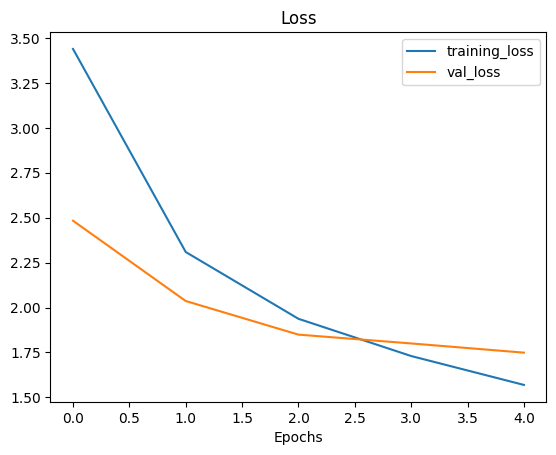

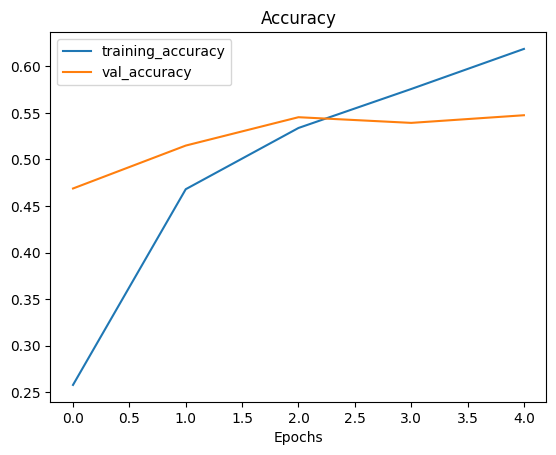

In [16]:
plot_loss_curves(history_all_classes_10_percent)

In [17]:
base_model.trainable = True


for layer in base_model.layers[:-5]:
  layer.trainable = False

In [18]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(0.0001),
    metrics = ["accuracy"]
)

In [19]:
for layer in model.layers:
  print(layer.name , layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
avg_global_pool_layer True
output_layer True


In [20]:
for i, layer in enumerate(model.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_layer False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [21]:
fine_tune_epochs = 10

history_all_classes_10_percent_fine_tune = model.fit(
    train_data_all_10_percent,
    epochs = fine_tune_epochs,
    validation_data= test_data,
    validation_steps = int(0.15 * len(test_data)),
    initial_epoch = history_all_classes_10_percent.epoch[-1],
)

Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 50s 160ms/step - accuracy: 0.6199 - loss: 1.5327 - val_accuracy: 0.5487 - val_loss: 1.7249
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - accuracy: 0.6693 - loss: 1.3322 - val_accuracy: 0.5609 - val_loss: 1.6808
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - accuracy: 0.6845 - loss: 1.2488 - val_accuracy: 0.5667 - val_loss: 1.6499
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 36s 151ms/step - accuracy: 0.6995 - loss: 1.1896 - val_accuracy: 0.5792 - val_loss: 1.5945
Epoch 9/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - accuracy: 0.7113 - loss: 1.1571 - val_accuracy: 0.5829 - val_loss: 1.5743
Epoch 10/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 40s 169ms/step - accuracy: 0.7306 - loss: 1.0791 - val_accuracy: 0.5826 - val_loss: 1.5762


In [22]:
model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 60s 75ms/step - accuracy: 0.6042 - loss: 1.4934


[1.4076286554336548, 0.6239603757858276]

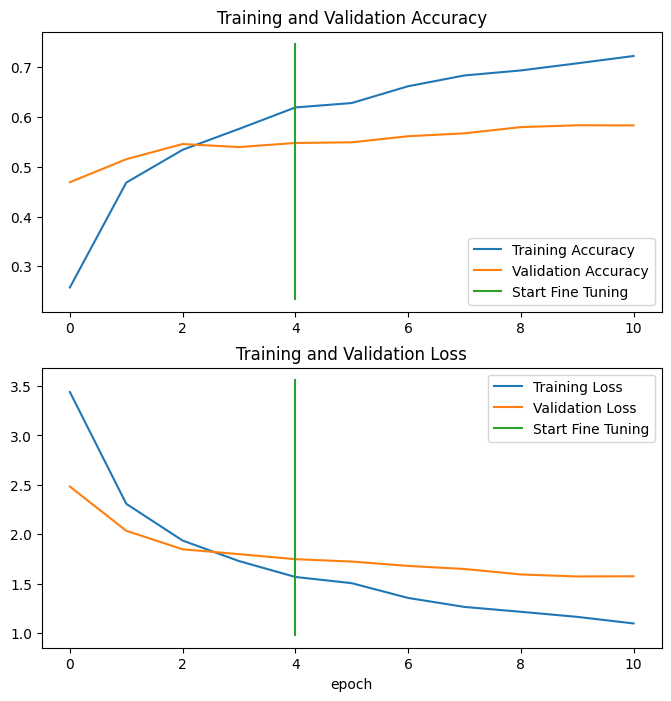

In [23]:
compare_historys(history_all_classes_10_percent, history_all_classes_10_percent_fine_tune)

In [24]:
model.save("/content/drive/MyDrive/Matchine Learning/Tensorflow Bootcamp/04 Transfer Learning/101_food_classes_10_percent_model.keras")

In [25]:
loded_model = tf.keras.models.load_model("/content/drive/MyDrive/Matchine Learning/Tensorflow Bootcamp/04 Transfer Learning/101_food_classes_10_percent_model.keras")

In [26]:
result_downalod_model = loded_model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 63s 74ms/step - accuracy: 0.6042 - loss: 1.4934


In [27]:
preds_probs = loded_model.predict(test_data, verbose = 1)

790/790 ━━━━━━━━━━━━━━━━━━━━ 65s 80ms/step


In [28]:
len(preds_probs)

25250

In [29]:
preds_probs.shape

(25250, 101)

In [30]:
preds_probs[:10]

array([[2.24470645e-01, 8.29546771e-04, 1.91389158e-01, ...,
        9.73389979e-05, 3.96294706e-03, 2.54820473e-02],
       [9.28835213e-01, 3.38725727e-07, 7.08931300e-04, ...,
        2.01882282e-03, 4.41166918e-07, 9.08509628e-06],
       [4.13222730e-01, 8.49458110e-03, 1.76559594e-02, ...,
        1.97213772e-03, 9.82061494e-04, 2.28828029e-03],
       ...,
       [1.80557236e-01, 1.93591404e-05, 1.86186063e-03, ...,
        1.15533926e-01, 3.55379772e-04, 1.30099055e-04],
       [1.67814985e-01, 6.90919522e-04, 1.02710277e-01, ...,
        6.90621440e-04, 2.24744144e-04, 2.46253971e-04],
       [5.98291755e-01, 3.90454898e-06, 4.86825407e-03, ...,
        3.69669474e-03, 6.73975455e-06, 8.20928137e-04]], dtype=float32)

In [31]:
preds_probs[0]

array([2.24470645e-01, 8.29546771e-04, 1.91389158e-01, 2.84465295e-06,
       8.65994589e-05, 1.23266900e-05, 5.83913410e-04, 2.61577934e-05,
       3.63290347e-02, 6.06524583e-04, 1.68156002e-05, 2.11861370e-05,
       2.88457680e-03, 1.67354233e-06, 1.45337684e-02, 2.74727144e-03,
       1.44176287e-04, 2.58481433e-03, 9.65482648e-03, 6.04108100e-05,
       1.75237714e-03, 1.74530127e-04, 6.53823896e-04, 7.60692055e-04,
       1.93714525e-03, 2.84852437e-03, 1.69690221e-03, 3.34197830e-04,
       6.61191493e-02, 5.16981212e-03, 2.00186914e-05, 3.31399660e-03,
       9.81857418e-04, 6.92136018e-05, 1.42197767e-02, 4.56985108e-05,
       4.30750399e-04, 1.82742556e-03, 2.50092708e-02, 2.00352413e-04,
       7.90453108e-04, 3.76475276e-03, 1.68510864e-03, 1.18129101e-04,
       4.95427870e-04, 1.44481179e-04, 1.96771068e-03, 1.02923688e-04,
       7.66892917e-05, 2.38190573e-02, 3.71952425e-04, 1.49309883e-04,
       1.05827592e-01, 2.04119924e-02, 3.40152270e-04, 2.69643515e-02,
      

In [32]:
sum(preds_probs[0])

1.0000000159827778

In [33]:
print(len(preds_probs[0]))
print(preds_probs[0])
print(preds_probs[0].argmax())

101
[2.24470645e-01 8.29546771e-04 1.91389158e-01 2.84465295e-06
 8.65994589e-05 1.23266900e-05 5.83913410e-04 2.61577934e-05
 3.63290347e-02 6.06524583e-04 1.68156002e-05 2.11861370e-05
 2.88457680e-03 1.67354233e-06 1.45337684e-02 2.74727144e-03
 1.44176287e-04 2.58481433e-03 9.65482648e-03 6.04108100e-05
 1.75237714e-03 1.74530127e-04 6.53823896e-04 7.60692055e-04
 1.93714525e-03 2.84852437e-03 1.69690221e-03 3.34197830e-04
 6.61191493e-02 5.16981212e-03 2.00186914e-05 3.31399660e-03
 9.81857418e-04 6.92136018e-05 1.42197767e-02 4.56985108e-05
 4.30750399e-04 1.82742556e-03 2.50092708e-02 2.00352413e-04
 7.90453108e-04 3.76475276e-03 1.68510864e-03 1.18129101e-04
 4.95427870e-04 1.44481179e-04 1.96771068e-03 1.02923688e-04
 7.66892917e-05 2.38190573e-02 3.71952425e-04 1.49309883e-04
 1.05827592e-01 2.04119924e-02 3.40152270e-04 2.69643515e-02
 1.24131059e-02 2.31280457e-03 1.15107698e-02 6.39135396e-05
 1.80959578e-05 4.29173931e-03 1.90780293e-02 4.83462325e-04
 2.25403463e-03 3.79

In [34]:
test_data.class_names[0]

'apple_pie'

In [35]:
pred_classes = preds_probs.argmax(axis = 1)

pred_classes[:10]

array([ 0,  0,  0,  0,  8, 78, 29,  0,  9,  0])

In [36]:
len(pred_classes)

25250

In [37]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 101), dtype=tf.float32, name=None))>

In [38]:
ylabels = []

for images, labels in test_data.unbatch():
  ylabels.append(labels.numpy().argmax())

ylabels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [39]:
len(ylabels)

25250

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
sklearn_accuracy = accuracy_score(
    y_true=ylabels,
    y_pred =pred_classes
    )

sklearn_accuracy

0.623960396039604

In [42]:
import numpy as np

In [43]:
np.isclose(result_downalod_model[1], sklearn_accuracy)

True

In [44]:
from helper_functions import make_confusion_matrix

In [45]:
class_names = test_data.class_names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [46]:
make_confusion_matrix(
    y_true=ylabels,
    y_pred=pred_classes,
    classes=class_names,
    figsize = (100, 100),
    text_size = 20
    )

Output hidden; open in https://colab.research.google.com to view.

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_true = ylabels, y_pred= pred_classes))

              precision    recall  f1-score   support

           0       0.38      0.25      0.30       250
           1       0.54      0.75      0.63       250
           2       0.65      0.66      0.66       250
           3       0.81      0.56      0.66       250
           4       0.52      0.47      0.49       250
           5       0.48      0.42      0.45       250
           6       0.78      0.76      0.77       250
           7       0.82      0.80      0.81       250
           8       0.30      0.57      0.39       250
           9       0.44      0.64      0.52       250
          10       0.51      0.45      0.48       250
          11       0.73      0.65      0.69       250
          12       0.69      0.63      0.66       250
          13       0.61      0.52      0.56       250
          14       0.61      0.63      0.62       250
          15       0.39      0.41      0.40       250
          16       0.67      0.53      0.59       250
          17       0.39    

In [49]:
classification_report_dic = classification_report(
    ylabels,
    pred_classes,
    output_dict =True
)

In [50]:
classification_report_dic

{'0': {'precision': 0.3803680981595092,
  'recall': 0.248,
  'f1-score': 0.30024213075060535,
  'support': 250.0},
 '1': {'precision': 0.5404624277456648,
  'recall': 0.748,
  'f1-score': 0.62751677852349,
  'support': 250.0},
 '2': {'precision': 0.6484375,
  'recall': 0.664,
  'f1-score': 0.6561264822134387,
  'support': 250.0},
 '3': {'precision': 0.8057142857142857,
  'recall': 0.564,
  'f1-score': 0.6635294117647059,
  'support': 250.0},
 '4': {'precision': 0.5246636771300448,
  'recall': 0.468,
  'f1-score': 0.49471458773784355,
  'support': 250.0},
 '5': {'precision': 0.4818181818181818,
  'recall': 0.424,
  'f1-score': 0.451063829787234,
  'support': 250.0},
 '6': {'precision': 0.78099173553719,
  'recall': 0.756,
  'f1-score': 0.7682926829268293,
  'support': 250.0},
 '7': {'precision': 0.8204081632653061,
  'recall': 0.804,
  'f1-score': 0.8121212121212121,
  'support': 250.0},
 '8': {'precision': 0.3021276595744681,
  'recall': 0.568,
  'f1-score': 0.39444444444444443,
  'sup

In [51]:
class_f1_scores = {}

for k, v in classification_report_dic.items():
  if k == "accuracy":
    break;
  else:
    class_f1_scores[class_names[int(k)]] = v['f1-score']

class_f1_scores

{'apple_pie': 0.30024213075060535,
 'baby_back_ribs': 0.62751677852349,
 'baklava': 0.6561264822134387,
 'beef_carpaccio': 0.6635294117647059,
 'beef_tartare': 0.49471458773784355,
 'beet_salad': 0.451063829787234,
 'beignets': 0.7682926829268293,
 'bibimbap': 0.8121212121212121,
 'bread_pudding': 0.39444444444444443,
 'breakfast_burrito': 0.5227272727272727,
 'bruschetta': 0.47983014861995754,
 'caesar_salad': 0.6878980891719745,
 'cannoli': 0.6582809224318659,
 'caprese_salad': 0.5603448275862069,
 'carrot_cake': 0.6205533596837944,
 'ceviche': 0.4,
 'cheese_plate': 0.5892857142857143,
 'cheesecake': 0.431858407079646,
 'chicken_curry': 0.5055762081784386,
 'chicken_quesadilla': 0.6549019607843137,
 'chicken_wings': 0.7444444444444445,
 'chocolate_cake': 0.5609756097560976,
 'chocolate_mousse': 0.39059674502712477,
 'churros': 0.7432432432432432,
 'clam_chowder': 0.7542857142857143,
 'club_sandwich': 0.7178423236514523,
 'crab_cakes': 0.43014705882352944,
 'creme_brulee': 0.785276073

In [52]:
import pandas as pd

In [53]:
f1_scores = pd.DataFrame({
    "class_names": list(class_f1_scores.keys()),
    "f1_score": list(class_f1_scores.values())
    }).sort_values("f1_score", ascending=False)

In [54]:
f1_scores

,class_names,f1_score
33,edamame,0.974155
63,macarons,0.867841
45,frozen_yogurt,0.862348
65,mussels,0.850622
86,sashimi,0.843373
...,...,...
77,pork_chop,0.349776
82,ravioli,0.344697
93,steak,0.338028
39,foie_gras,0.330827


In [55]:
import matplotlib.pyplot as plt

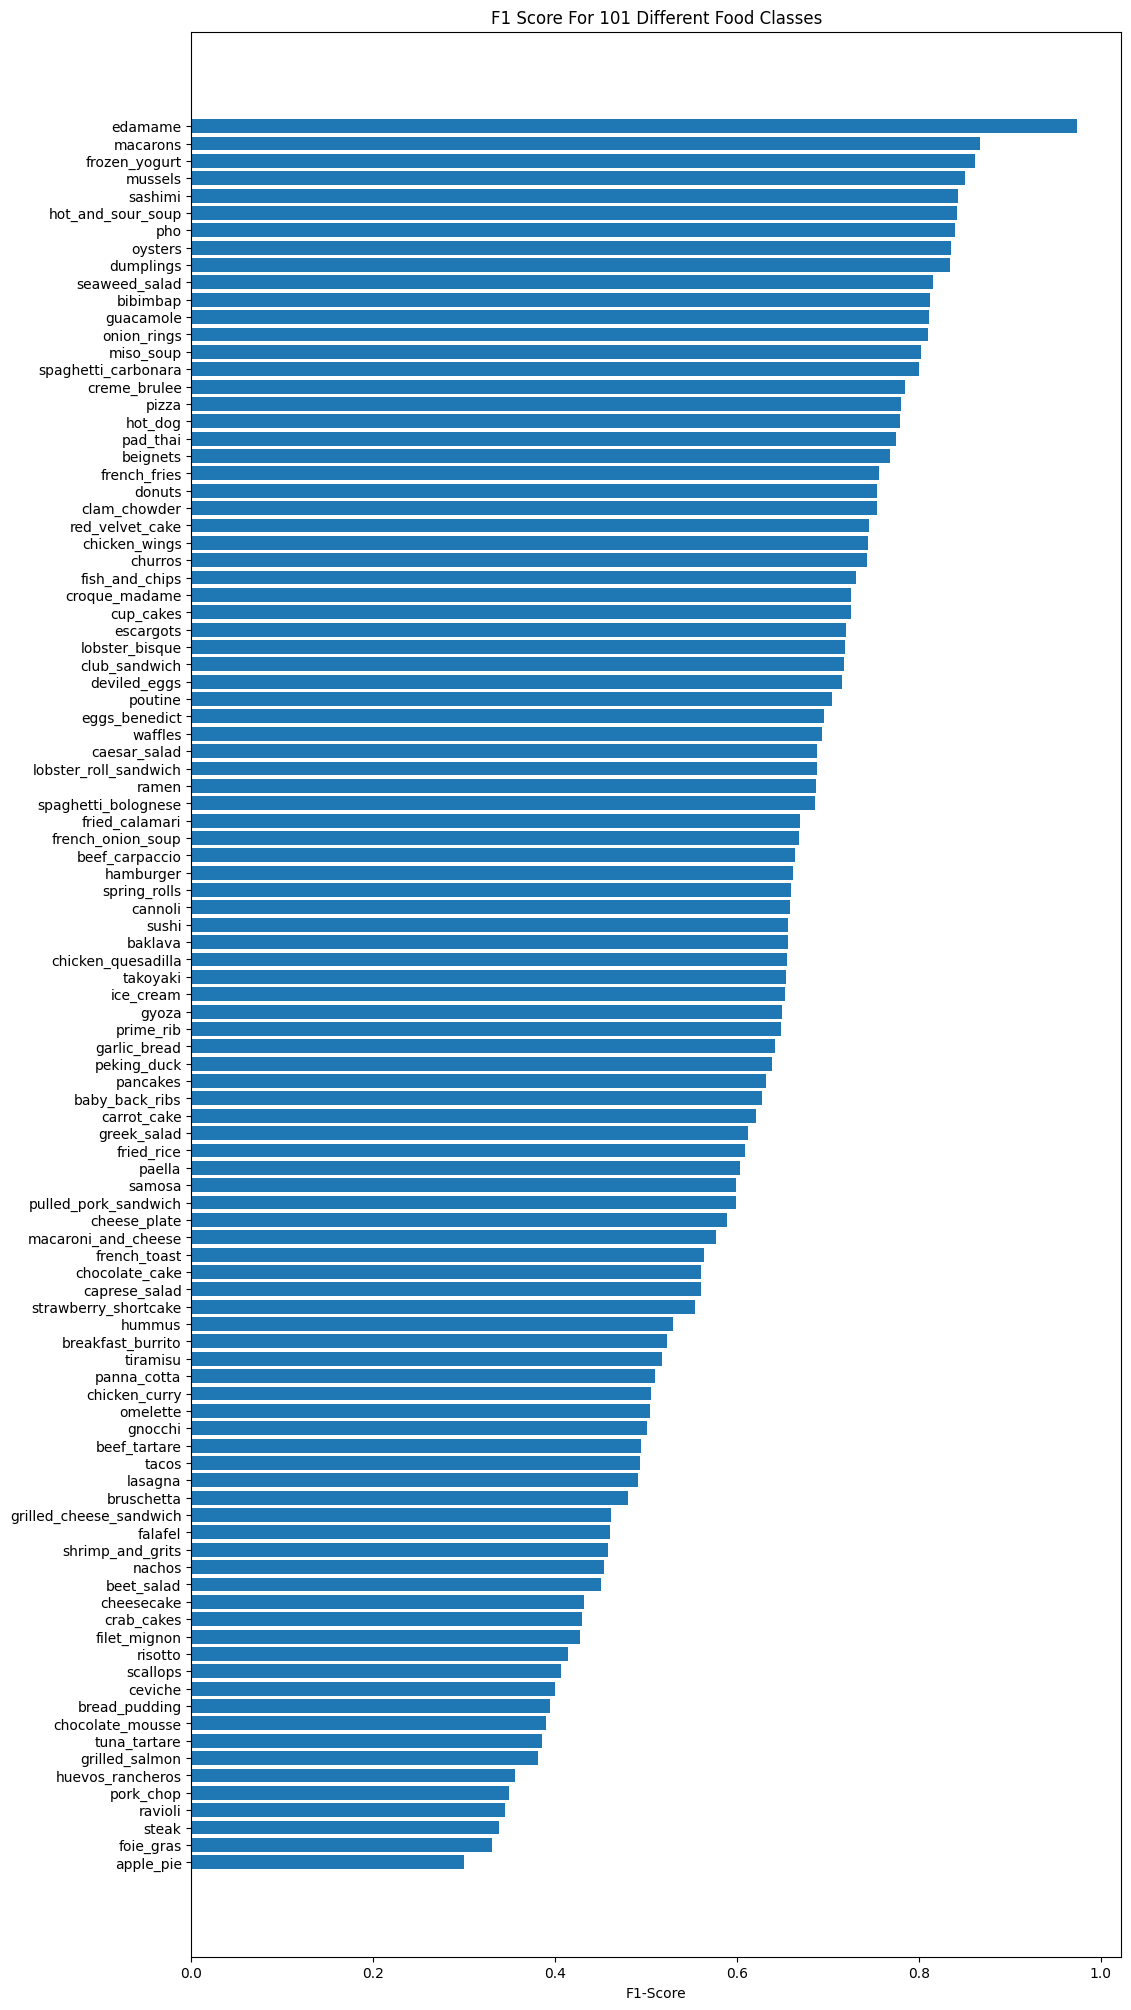

In [56]:
fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1_score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("F1-Score")
ax.set_title("F1 Score For 101 Different Food Classes")
ax.invert_yaxis()

In [57]:
def load_and_prep_image(filename, img_shape= 224, scale=True):
  img  = tf.io.read_file(filename)

  img = tf.io.decode_image(img, channels = 3)

  img = tf.image.resize(img, [img_shape, img_shape])

  if scale:
    return img / 255.
  else:
    return img

In [59]:
import os
import random

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


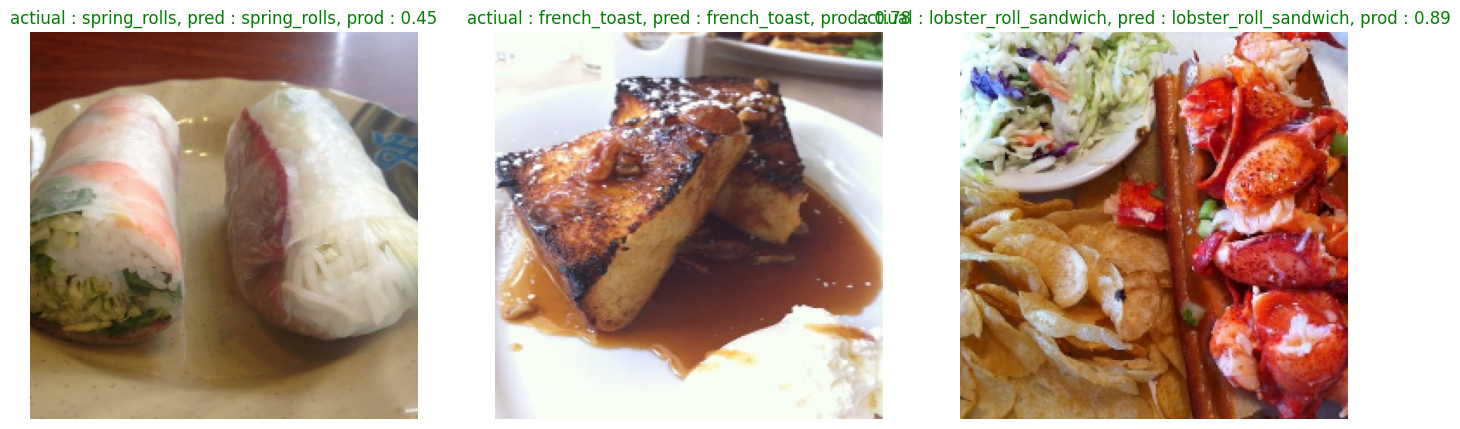

In [67]:
plt.figure(figsize=(17, 10))

for i in range(3):
  class_name = random.choice(class_names)
  file_name = random.choice(os.listdir(test_dir + "/" + class_name))
  file_path = test_dir + "/" + class_name + "/" + file_name

  img = load_and_prep_image(file_path, scale=False)
  pred_prob = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[pred_prob.argmax()]

  plt.subplot(1, 3, i + 1)
  plt.imshow(img / 255.)
  if class_name == pred_class:
    title_color = "g"
  else :
    title_color = "r"

  plt.title(f"actiual : {class_name}, pred : {pred_class}, prod : {pred_prob.max():.2f}", c = title_color)
  plt.axis(False);

In [71]:
filepaths = []

for filepath in test_data.list_files("/content/101_food_classes_10_percent/test/*/*.jpg", shuffle = False):
  filepaths.append(filepath.numpy())

filepaths[:10]

[b'/content/101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [73]:
pred_df = pd.DataFrame({
    "img_path": filepaths,
    "y_true": ylabels,
    "y_pred": pred_classes,
    "pred_conf": preds_probs.max(axis = 1),
    "y_true_class_name": [class_names[i] for i in ylabels],
    "y_pred_class_name": [class_names[i] for i in pred_classes]
    })

pred_df

,img_path,y_true,y_pred,pred_conf,y_true_class_name,y_pred_class_name
0,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.224471,apple_pie,apple_pie
1,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.928835,apple_pie,apple_pie
2,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.413223,apple_pie,apple_pie
3,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.197469,apple_pie,apple_pie
4,b'/content/101_food_classes_10_percent/test/ap...,0,8,0.499097,apple_pie,bread_pudding
...,...,...,...,...,...,...
25245,b'/content/101_food_classes_10_percent/test/wa...,100,100,0.975638,waffles,waffles
25246,b'/content/101_food_classes_10_percent/test/wa...,100,16,0.537764,waffles,cheese_plate
25247,b'/content/101_food_classes_10_percent/test/wa...,100,100,0.422736,waffles,waffles
25248,b'/content/101_food_classes_10_percent/test/wa...,100,94,0.232829,waffles,strawberry_shortcake


In [74]:
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]

In [75]:
pred_df.head()

,img_path,y_true,y_pred,pred_conf,y_true_class_name,y_pred_class_name,pred_correct
0,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.224471,apple_pie,apple_pie,True
1,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.928835,apple_pie,apple_pie,True
2,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.413223,apple_pie,apple_pie,True
3,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.197469,apple_pie,apple_pie,True
4,b'/content/101_food_classes_10_percent/test/ap...,0,8,0.499097,apple_pie,bread_pudding,False


In [77]:
top_100_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending= False)[:100]

In [79]:
top_100_wrong.head(20)

,img_path,y_true,y_pred,pred_conf,y_true_class_name,y_pred_class_name,pred_correct
11642,b'/content/101_food_classes_10_percent/test/ga...,46,10,0.996653,garlic_bread,bruschetta,False
10013,b'/content/101_food_classes_10_percent/test/fr...,40,43,0.994929,french_fries,fried_calamari,False
22,b'/content/101_food_classes_10_percent/test/ap...,0,100,0.992069,apple_pie,waffles,False
18001,b'/content/101_food_classes_10_percent/test/pa...,72,67,0.991607,pancakes,omelette,False
9202,b'/content/101_food_classes_10_percent/test/fa...,36,20,0.991010,falafel,chicken_wings,False
23797,b'/content/101_food_classes_10_percent/test/su...,95,86,0.990730,sushi,sashimi,False
21400,b'/content/101_food_classes_10_percent/test/sa...,85,92,0.990437,samosa,spring_rolls,False
15177,b'/content/101_food_classes_10_percent/test/lo...,60,92,0.988638,lobster_bisque,spring_rolls,False
8794,b'/content/101_food_classes_10_percent/test/es...,35,41,0.987416,escargots,french_onion_soup,False
191,b'/content/101_food_classes_10_percent/test/ap...,0,31,0.986199,apple_pie,donuts,False


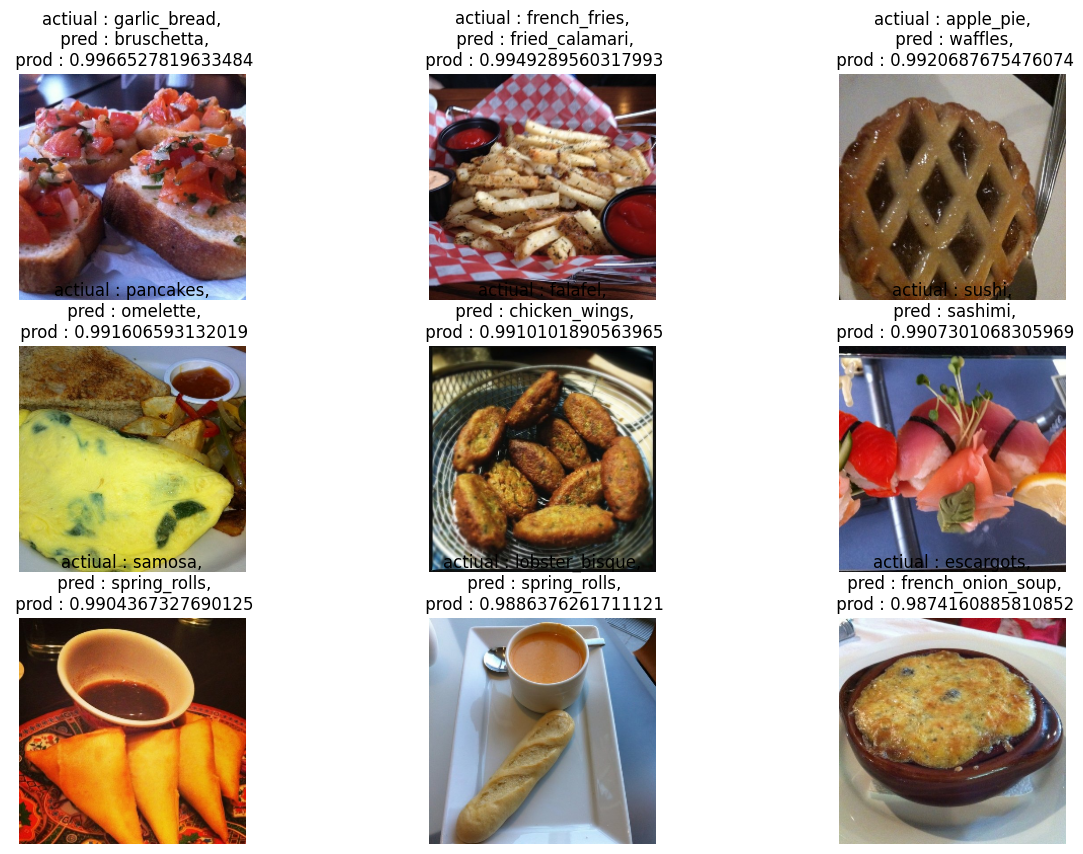

In [87]:
images_to_view = 9
start_index = 0
plt.figure(figsize = (15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=False)
  _, _, _, _, pred_prob, y_true_classname, y_pred_class_name, _ = row
  plt.imshow(img / 255.)
  plt.title(f"actiual : {y_true_classname},\n pred : {y_pred_class_name},\n prod : {pred_prob}")
  plt.axis(False)